# March Madness Team Advancement Probabilities
## 1. Problem Statement
- This project understands how success in the NCAA College Basketball Tournament (how far a team goes) is affected by numerous team variables. This knowledge will then be used to predict team success in the 2024 College Basketball Tournament.

## 2. Data Collection
- Dataset source - https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

## 2.1 Import Data and Required Packages
### Importing Pandas, Numpy, Seaborn, Matplotlib, and Scikit-Learn

In [906]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', 200)

### Import the CSV Data as Pandas DataFrame

In [907]:
df = pd.read_csv('data/cbb.csv')
df_em = pd.read_csv('data/evanmiya_final.csv')





In [908]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [909]:
df_em.head()

,TEAM,YEAR,OBPR,DBPR,BPR,HOME_RANK
0,Louisville,2013,12.182831,15.316494,27.499324,236
1,Kansas,2013,11.948855,14.740787,26.689642,11
2,Gonzaga,2013,16.093534,9.716576,25.810110,107
3,Michigan,2013,17.871829,6.723118,24.594947,68
4,Florida,2013,12.404495,12.017803,24.422298,31


In [910]:
df.shape , df_em.shape

((3523, 24), (3522, 6))

### Combine the Two DataFrames

In [911]:
df = pd.merge(df, df_em, on=['TEAM', 'YEAR'], how='inner')
df.columns = df.columns.astype(str)
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,OBPR,DBPR,BPR,HOME_RANK
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,18.827107,9.847130,28.674237,116
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,23.115850,7.664675,30.780525,136
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,11.508490,12.251588,23.760078,146
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,9.637031,16.547367,26.184398,49
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,12.643178,15.580069,28.223247,293


## 2.2 Dataset Information
- RK (Only in cbb20): The ranking of the team at the end of the regular season according to barttorvik
- TEAM: The Division I college basketball school
- CONF: Conference Team is in 
- G: Number of games played
- W: Number of games won
- ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)
- ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)
- BARTHAG: Power Rating (Chance of beating an average Division I team)
- EFG_O: Effective Field Goal Percentage Shot
- EFG_D: Effective Field Goal Percentage Allowed
- TOR: Turnover Percentage Allowed (Turnover Rate)
- TORD: Turnover Percentage Committed (Steal Rate)
- ORB: Offensive Rebound Rate
- DRB: Offensive Rebound Rate Allowed
- FTR : Free Throw Rate (How often the given team shoots Free Throws)
- FTRD: Free Throw Rate Allowed
- 2P_O: Two-Point Shooting Percentage
- 2P_D: Two-Point Shooting Percentage Allowed
- 3P_O: Three-Point Shooting Percentage
- 3P_D: Three-Point Shooting Percentage Allowed
- ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)
- OBPR: Teams expected offensive efficiency (Points per 100 possesions better than average)
- DBPR: Teams expected defensive efficiency
- BPR: Sum of OBPR and DBPR
- WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)
- POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)
- SEED: Seed in the NCAA March Madness Tournament
- YEAR: Season

## 3. Data Checks
### 3.1 Check Missing Values

In [912]:
df.isna().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    2571
SEED          2571
YEAR             0
OBPR             0
DBPR             0
BPR              0
HOME_RANK        0
dtype: int64

### Data set contains teams who did not make the tournament. Remove those teams. 

In [913]:
df = df.dropna(subset=['POSTSEASON'])
df.isna().sum()

TEAM          0
CONF          0
G             0
W             0
ADJOE         0
ADJDE         0
BARTHAG       0
EFG_O         0
EFG_D         0
TOR           0
TORD          0
ORB           0
DRB           0
FTR           0
FTRD          0
2P_O          0
2P_D          0
3P_O          0
3P_D          0
ADJ_T         0
WAB           0
POSTSEASON    0
SEED          0
YEAR          0
OBPR          0
DBPR          0
BPR           0
HOME_RANK     0
dtype: int64

### There are no more missing values

### 3.2 Remove R68 Teams
Also remove teams who lost in the First Four games (R68). Only eight teams play in this wild card round each year so we will remove it for simplicity. 

In [914]:
df = df[df['POSTSEASON'] != 'R68']

### 3.3 Check Duplicates

In [915]:
df.duplicated(subset=['TEAM', 'YEAR']).sum()

0

### There are no duplicates

### 3.4 Remove Unwanted Columns

In [916]:

df = df.drop(columns=['YEAR', 'TEAM', 'G', 'W', 'CONF', '3P_O', '3P_D', '2P_O', '2P_D']) 

### 3P and 2P features are essentially taken care of by EFG features

### The 3P and 2P categories are essentially taken care of by EFG and EFG_D

### 3.5 Check Data Types

In [917]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 0 to 2953
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADJOE       618 non-null    float64
 1   ADJDE       618 non-null    float64
 2   BARTHAG     618 non-null    float64
 3   EFG_O       618 non-null    float64
 4   EFG_D       618 non-null    float64
 5   TOR         618 non-null    float64
 6   TORD        618 non-null    float64
 7   ORB         618 non-null    float64
 8   DRB         618 non-null    float64
 9   FTR         618 non-null    float64
 10  FTRD        618 non-null    float64
 11  ADJ_T       618 non-null    float64
 12  WAB         618 non-null    float64
 13  POSTSEASON  618 non-null    object 
 14  SEED        618 non-null    float64
 15  OBPR        618 non-null    float64
 16  DBPR        618 non-null    float64
 17  BPR         618 non-null    float64
 18  HOME_RANK   618 non-null    int64  
dtypes: float64(17), int64(1), object(

### 3.6 Ordinally Encode 'POSTSEASON' Variable

In [918]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['R64', 'R32', 'S16', 'E8', 'F4', '2ND', 'Champions']

ordinal_encoder = OrdinalEncoder(categories=[categories])
ordinal_encoder.fit(df[['POSTSEASON']])
df['POSTSEASON'] = ordinal_encoder.transform(df[['POSTSEASON']])


In [919]:
df['POSTSEASON']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
2949    0.0
2950    2.0
2951    1.0
2952    0.0
2953    0.0
Name: POSTSEASON, Length: 618, dtype: float64

### 3.8 Correlation and Heatmap
### Check for extreme correlations between independent variables

d:\MMPredictionsProject\venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

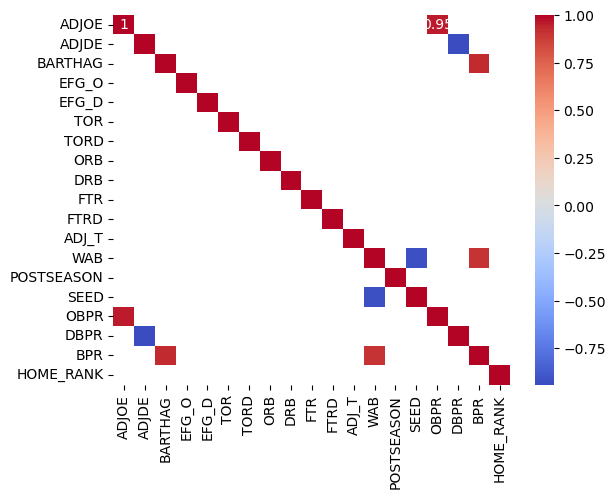

In [920]:
df_no_conf = df.filter(regex='^(?!CONF).*', axis=1)
corr_matrix = df_no_conf.corr()
filtered_corr_matrix = corr_matrix[(corr_matrix > 0.9) | (corr_matrix < -0.9)]
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')

In [921]:
df_no_conf.corr()

,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,ADJ_T,WAB,POSTSEASON,SEED,OBPR,DBPR,BPR,HOME_RANK
ADJOE,1.000000,-0.244612,0.758862,0.561782,-0.003747,-0.471111,-0.207938,0.218613,-0.044293,-0.115169,-0.207687,0.116726,0.752061,0.510849,-0.740695,0.954979,0.320051,0.807871,-0.145883
ADJDE,-0.244612,1.000000,-0.753471,0.171250,0.704053,-0.048088,-0.278763,-0.303626,0.132953,0.036113,0.046371,0.188258,-0.691947,-0.412314,0.671917,-0.284035,-0.939705,-0.718973,0.181710
BARTHAG,0.758862,-0.753471,1.000000,0.222903,-0.390382,-0.267555,0.017647,0.293320,-0.121824,-0.111322,-0.148139,-0.029865,0.882881,0.470262,-0.836062,0.756694,0.762953,0.928846,-0.204313
EFG_O,0.561782,0.171250,0.222903,1.000000,0.179603,-0.240003,-0.277060,-0.314357,-0.251672,-0.244363,-0.313680,0.158870,0.262448,0.210115,-0.202645,0.576407,-0.137863,0.299973,-0.029431
EFG_D,-0.003747,0.704053,-0.390382,0.179603,1.000000,-0.189748,-0.001602,-0.325085,0.036897,-0.143860,-0.030791,0.232499,-0.386115,-0.230928,0.353109,-0.043549,-0.675877,-0.411672,0.108543
TOR,-0.471111,-0.048088,-0.267555,-0.240003,-0.189748,1.000000,0.151258,0.301650,0.131825,0.303461,0.215941,-0.004606,-0.280709,-0.187329,0.255378,-0.442770,-0.036117,-0.310925,0.012458
TORD,-0.207938,-0.278763,0.017647,-0.277060,-0.001602,0.151258,1.000000,0.169996,0.396420,0.061405,0.452904,-0.009442,0.004903,0.043825,-0.004823,-0.188534,0.243833,0.014534,-0.036220
ORB,0.218613,-0.303626,0.293320,-0.314357,-0.325085,0.301650,0.169996,1.000000,0.166470,0.293100,0.265693,-0.024618,0.295362,0.187686,-0.306954,0.212394,0.329660,0.326188,-0.107161
DRB,-0.044293,0.132953,-0.121824,-0.251672,0.036897,0.131825,0.396420,0.166470,1.000000,0.258916,0.323490,0.090293,-0.120241,0.004592,0.055712,-0.068383,-0.117322,-0.111360,-0.016276
FTR,-0.115169,0.036113,-0.111322,-0.244363,-0.143860,0.303461,0.061405,0.293100,0.258916,1.000000,0.391816,0.023139,-0.052315,-0.078148,0.062835,-0.149995,-0.001426,-0.099204,-0.021705


### Drop one of the features in an above 0.9 correlation pair

In [922]:
df = df.drop(columns=['BARTHAG', 'ADJOE', 'ADJDE', 'WAB'])

d:\MMPredictionsProject\venv\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

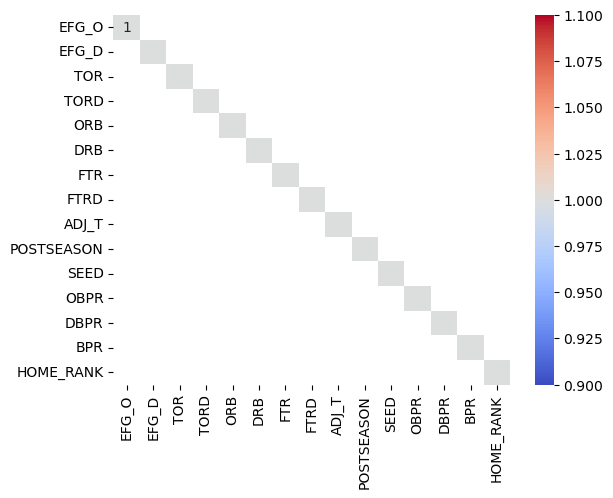

In [923]:
df_no_conf = df.filter(regex='^(?!CONF).*', axis=1)
corr_matrix = df_no_conf.corr()
filtered_corr_matrix = corr_matrix[(corr_matrix > 0.9) | (corr_matrix < -0.9)]
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')

In [924]:
df_no_conf.corr()

,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,ADJ_T,POSTSEASON,SEED,OBPR,DBPR,BPR,HOME_RANK
EFG_O,1.000000,0.179603,-0.240003,-0.277060,-0.314357,-0.251672,-0.244363,-0.313680,0.158870,0.210115,-0.202645,0.576407,-0.137863,0.299973,-0.029431
EFG_D,0.179603,1.000000,-0.189748,-0.001602,-0.325085,0.036897,-0.143860,-0.030791,0.232499,-0.230928,0.353109,-0.043549,-0.675877,-0.411672,0.108543
TOR,-0.240003,-0.189748,1.000000,0.151258,0.301650,0.131825,0.303461,0.215941,-0.004606,-0.187329,0.255378,-0.442770,-0.036117,-0.310925,0.012458
TORD,-0.277060,-0.001602,0.151258,1.000000,0.169996,0.396420,0.061405,0.452904,-0.009442,0.043825,-0.004823,-0.188534,0.243833,0.014534,-0.036220
ORB,-0.314357,-0.325085,0.301650,0.169996,1.000000,0.166470,0.293100,0.265693,-0.024618,0.187686,-0.306954,0.212394,0.329660,0.326188,-0.107161
DRB,-0.251672,0.036897,0.131825,0.396420,0.166470,1.000000,0.258916,0.323490,0.090293,0.004592,0.055712,-0.068383,-0.117322,-0.111360,-0.016276
FTR,-0.244363,-0.143860,0.303461,0.061405,0.293100,0.258916,1.000000,0.391816,0.023139,-0.078148,0.062835,-0.149995,-0.001426,-0.099204,-0.021705
FTRD,-0.313680,-0.030791,0.215941,0.452904,0.265693,0.323490,0.391816,1.000000,0.077396,-0.133378,0.190034,-0.278479,-0.000946,-0.183216,0.035980
ADJ_T,0.158870,0.232499,-0.004606,-0.009442,-0.024618,0.090293,0.023139,0.077396,1.000000,-0.022233,-0.015707,0.056201,-0.132428,-0.038196,0.025578
POSTSEASON,0.210115,-0.230928,-0.187329,0.043825,0.187686,0.004592,-0.078148,-0.133378,-0.022233,1.000000,-0.536449,0.519930,0.455348,0.599172,-0.140636


## 4. Exploratory Data Analysis

## 5. Model Training
### 5.1 Split into train and test data

In [925]:
# Assign X and Y variables
X = df.drop('POSTSEASON', axis=1)
y = df['POSTSEASON']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [926]:
X_train.shape, X_test.shape


((463, 14), (155, 14))

### 5.3 Tune Paramters and Train Models

In [927]:
# Still need to hyper tune
# Standardize features
'''
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 5.4 Predict on the Test Data and Evaluate

In [928]:

y_pred_rf = rf.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy: ", accuracy_rf)


Accuracy:  0.5612903225806452


### 5.5 Evaluation of Model

In [929]:
print(confusion_matrix(y_test, y_pred_rf))
print()

[[67  6  3  1  0  0  0]
 [22 13  6  0  1  0  0]
 [ 8  5  4  0  0  0  0]
 [ 2  3  2  3  0  0  0]
 [ 2  1  0  1  0  0  0]
 [ 1  1  1  0  0  0  0]
 [ 0  0  0  1  0  1  0]]



In [930]:
print(classification_report(y_test, y_pred_rf, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.66      0.87      0.75        77
         1.0       0.45      0.31      0.37        42
         2.0       0.25      0.24      0.24        17
         3.0       0.50      0.30      0.37        10
         4.0       0.00      0.00      1.00         4
         5.0       0.00      0.00      1.00         3
         6.0       1.00      0.00      0.00         2

    accuracy                           0.56       155
   macro avg       0.41      0.24      0.53       155
weighted avg       0.52      0.56      0.57       155



### 5.6 View Feature Importance

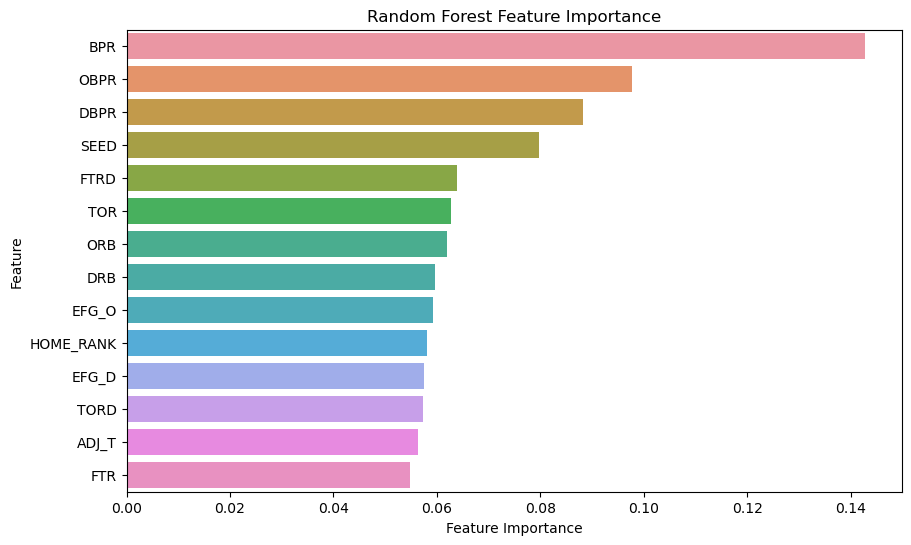

In [931]:
# Get feature importances and corresponding feature names
feature_importance = rf.feature_importances_
feature_names = X.columns  


# Sort feature importances and feature names in ascending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Create a horizontal bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importance, y=sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()



In [932]:
'''
prob = [rf.predict_proba([row])[0] for index, row in X.iterrows()]
output_df = pd.DataFrame(prob, columns=['R64', 'R32', 'S16', 'E8', 'F4', 'F2', 'Champ'])
output_df.index = X.index

df_2022 = df_2022.merge(output_df, left_index=True, right_index=True)
del df_2022['YEAR']

# Pivot the DataFrame so that 'TEAM' becomes the index
df_2022_pivot = df_2022.set_index('TEAM')

# Plotting the pivoted DataFrame as a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df_2022_pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('DataFrame 2022')
plt.ylabel('TEAM')  # Label for the first column
plt.show() 
'''

'\nprob = [rf.predict_proba([row])[0] for index, row in X.iterrows()]\noutput_df = pd.DataFrame(prob, columns=[\'R64\', \'R32\', \'S16\', \'E8\', \'F4\', \'F2\', \'Champ\'])\noutput_df.index = X.index\n\ndf_2022 = df_2022.merge(output_df, left_index=True, right_index=True)\ndel df_2022[\'YEAR\']\n\n# Pivot the DataFrame so that \'TEAM\' becomes the index\ndf_2022_pivot = df_2022.set_index(\'TEAM\')\n\n# Plotting the pivoted DataFrame as a heatmap\nplt.figure(figsize=(20, 12))\nsns.heatmap(df_2022_pivot, annot=True, cmap=\'coolwarm\', fmt=".2f", linewidths=.5)\nplt.title(\'DataFrame 2022\')\nplt.ylabel(\'TEAM\')  # Label for the first column\nplt.show() \n'